### Machine Learning-Based Spam Detection

In [21]:
import pandas as pd
import numpy as np
import nltk
import re
from tqdm import tqdm
import matplotlib.pyplot as plt
from nltk.stem import WordNetLemmatizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.model_selection import train_test_split
from wordcloud import WordCloud

In [22]:
import spacy

In [23]:
## importing the dataset and passed encoding=’ISO-8859-1′ so that it can tackle special characters like emojis also
df = pd.read_csv('spam.csv',encoding='ISO-8859-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [24]:
df.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

### Here we are dropping the unwanted column

In [25]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

### Changing the column name

In [26]:
df.columns = ['label','message']

In [27]:
df

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


### Here we have created the user defined function for Preprocessing 

In [32]:
def preprocessed_text(sentence):
    ### removing all the special characters from the sentence
    sentence=re.sub(pattern=r'[^a-zA-Z]',repl=' ',string=sentence)
    ### converting it into lowercase
    sentence=sentence.lower()
    ### here we are removing the url link from the sentence
    sentence=re.sub(pattern=r'http\S+',repl=' ',string=sentence)
    ### splitting the sentence into words
    sentence=sentence.split()
    ### removing the stopwords
    sentence=[word for word in sentence if not word in nltk.corpus.stopwords.words('english')]
    ### making it into sentence
    sentence=' '.join(sentence)
    ### Lemmatization
    lemmatizer = WordNetLemmatizer()
    words = nltk.word_tokenize(sentence)
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
    # join the lemmatized words back into a sentence
    lemmatized_sentence = ' '.join(lemmatized_words)
    
    return lemmatized_sentence

### Preprocessing is done for all message text

In [37]:
new=[]
for i in tqdm(df.message):
    new.append(preprocessed_text(i))

100%|█████████████████████████████████████████████████████████████████████████████| 5572/5572 [00:32<00:00, 169.08it/s]


In [38]:
new

['go jurong point crazy available bugis n great world la e buffet cine got amore wat',
 'ok lar joking wif u oni',
 'free entry wkly comp win fa cup final tkts st may text fa receive entry question std txt rate c apply',
 'u dun say early hor u c already say',
 'nah think go usf life around though',
 'freemsg hey darling week word back like fun still tb ok xxx std chgs send rcv',
 'even brother like speak treat like aid patent',
 'per request melle melle oru minnaminunginte nurungu vettam set callertune caller press copy friend callertune',
 'winner valued network customer selected receivea prize reward claim call claim code kl valid hour',
 'mobile month u r entitled update latest colour mobile camera free call mobile update co free',
 'gon na home soon want talk stuff anymore tonight k cried enough today',
 'six chance win cash pound txt csh send cost p day day tsandcs apply reply hl info',
 'urgent week free membership prize jackpot txt word claim c www dbuk net lccltd pobox ldnw rw

### Adding the cleaned text into the dataframe

In [39]:
df['cleaned_message']=new

In [40]:
df

,label,message,cleaned_message
0,ham,"Go until jurong point, crazy.. Available only ...",go jurong point crazy available bugis n great ...
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry wkly comp win fa cup final tkts st ...
3,ham,U dun say so early hor... U c already then say...,u dun say early hor u c already say
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah think go usf life around though
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,nd time tried contact u u pound prize claim ea...
5568,ham,Will Ì_ b going to esplanade fr home?,b going esplanade fr home
5569,ham,"Pity, * was in mood for that. So...any other s...",pity mood suggestion
5570,ham,The guy did some bitching but I acted like i'd...,guy bitching acted like interested buying some...


In [72]:
def visualize(label):
    words = ''
    for msg in df[df['label']==label]['cleaned_message']:
        msg = msg.lower()
        words+=msg + ' '
    wordcloud = WordCloud(width=800,height=500).generate(words)
    plt.figure(figsize=(20, 12))
    plt.imshow(wordcloud)
    plt.axis('off')

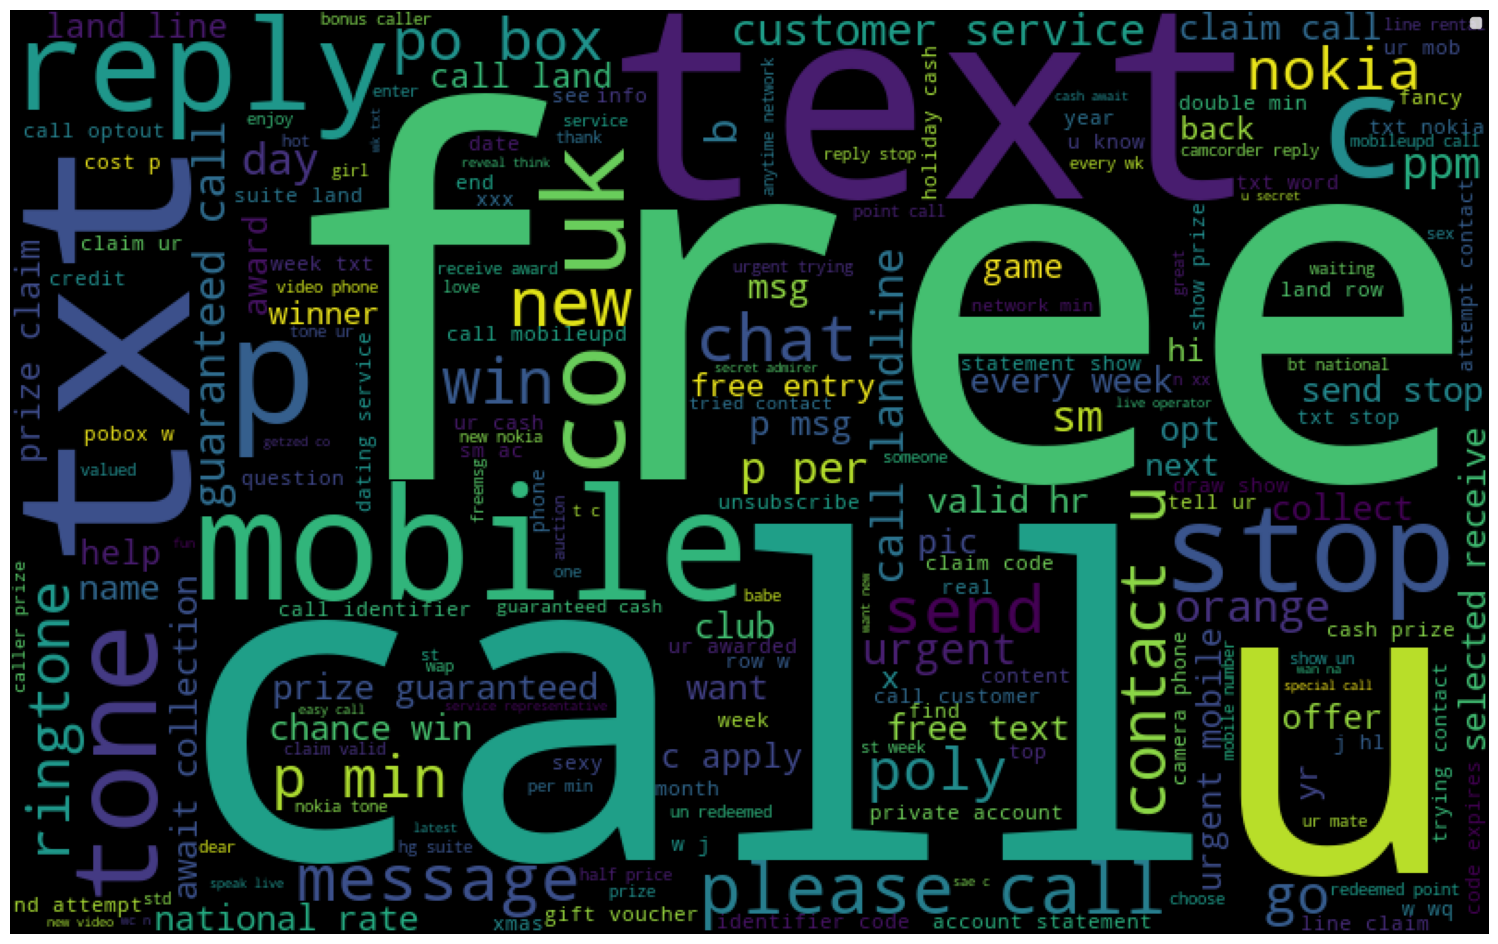

In [73]:
visualize('spam')

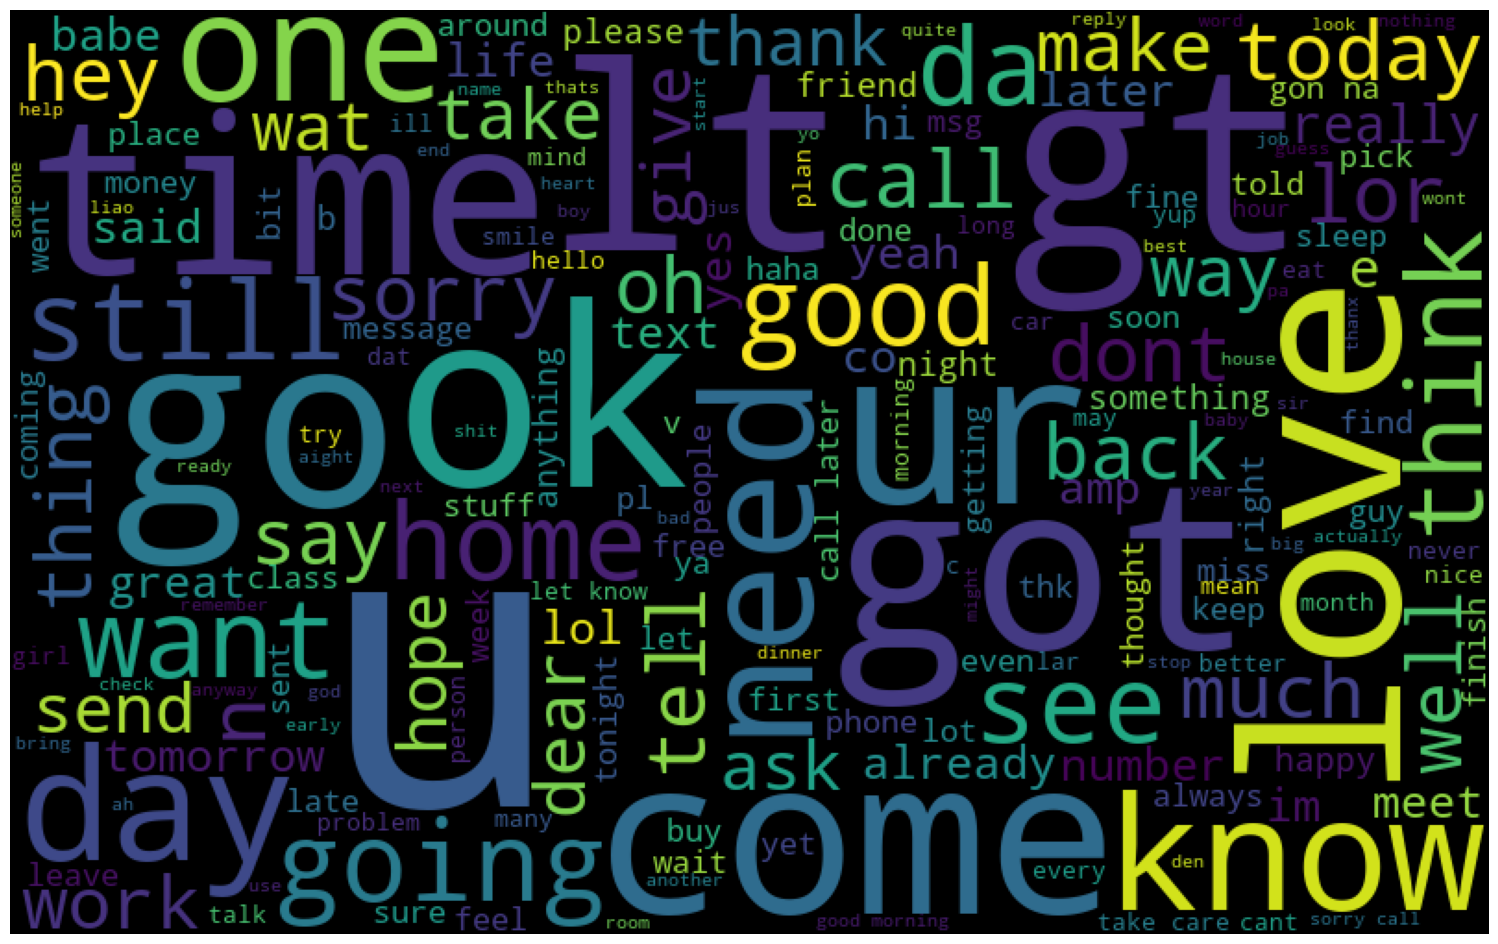

In [59]:
visualize('ham')

### Spliting the dataset

In [44]:
### defined count vectorizer over here
cv = CountVectorizer(decode_error='ignore')
### transorming the text and assigning x & y variable
x = cv.fit_transform(df['cleaned_message'])
y=df['label']
### splitting the dataset into train and test
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.3, random_state=42)

### Creating a MultinomialNB model

In [46]:
model = MultinomialNB()
model.fit(xtrain,ytrain)
print('training accuracy is --> ',model.score(xtrain,ytrain)*100)
print('test accuracy is --> ',model.score(xtest,ytest)*100)

training accuracy is -->  99.33333333333333
test accuracy is -->  97.1291866028708


### Predicting the model with new text

In [69]:
# Random text is given to validate the model
your_message = "URGENT: You have won a prize! Click here to claim now!"
your_message = cv.transform([your_message])
predicted = model.predict(your_message)
print(f'This is a {predicted[0]} message')

This is a spam message


In [67]:
predicted[0]

'spam'

In [71]:
your_message = 'hi how are you can you text me later'
your_message = cv.transform([your_message])
predicted = model.predict(your_message)
print(f'This is a {predicted[0]} message')

This is a ham message


### SVM Model

In [75]:
model_1 = SVC(kernel = 'rbf')
model_1.fit(xtrain, ytrain)
print('training accuracy is --> ',model_1.score(xtrain,ytrain)*100)
print('test accuracy is --> ',model_1.score(xtest,ytest)*100)

training accuracy is -->  99.64102564102564
test accuracy is -->  97.30861244019138


In [79]:
your_message = "URGENT: You have won a prize! Click here to claim now!"
your_message = cv.transform([your_message])
predicted = model_1.predict(your_message)
print(f'This is a {predicted[0]} message')

This is a spam message


In [80]:
your_message = 'hi how are you can you text me later'
your_message = cv.transform([your_message])
predicted = model_1.predict(your_message)
print(f'This is a {predicted[0]} message')

This is a ham message


### Randomforest model

In [83]:
model_2 = RandomForestClassifier(n_estimators = 200)
model_2.fit(xtrain, ytrain)
print('training accuracy is --> ',model_2.score(xtrain,ytrain)*100)
print('test accuracy is --> ',model_2.score(xtest,ytest)*100)

training accuracy is -->  100.0
test accuracy is -->  97.54784688995215


In [84]:
your_message = "URGENT: You have won a prize! Click here to claim now!"
your_message = cv.transform([your_message])
predicted = model_2.predict(your_message)
print(f'This is a {predicted[0]} message')

This is a spam message
